In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.stats as st

In [31]:
def plot_workload(ext):
    files = ["data/db_%s.csv", "data/shilldb_no_trigger_%s.csv", "data/shilldb_%s.csv", "data/shilldbctc_%s.csv"]
    
    means = []
    intervals = []
    
    for f in files:
        df = pd.read_csv(f % ext)["0"]
        means.append(df.mean())
        low, high = st.t.interval(0.95, len(df)-1, loc=np.mean(df), scale=st.sem(df))
        intervals.append((df.mean() - low, high - df.mean()))
                  
    intervals = zip(*intervals)
    plt.errorbar([1, 2, 3, 4], means, yerr=intervals, fmt='o')
    plt.xlim(0, 5)
    plt.show()
    return means, intervals
#     return means, map(lambda x : (x -  means[0]) / means[0] * 100, means)

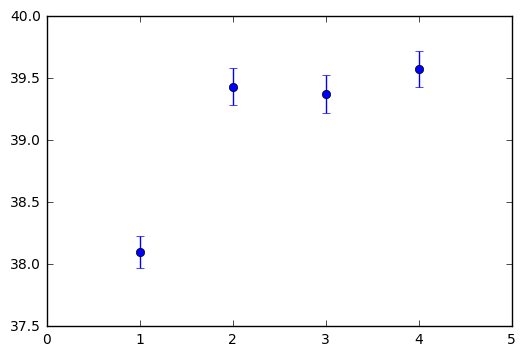

([38.101693673134001, 39.434393281934, 39.375318531985997, 39.576790122977997],
 [(0.13153136181804825,
   0.14639982662207984,
   0.1510324652237145,
   0.14208904741425954),
  (0.13153136181804825,
   0.14639982662207984,
   0.1510324652237145,
   0.14208904741425954)])

In [32]:
plot_workload("read_revised")

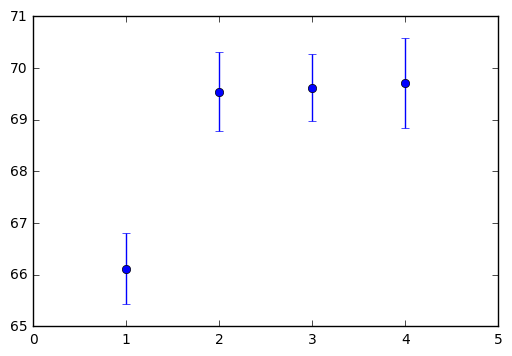

([66.121367049215991, 69.540185952184004, 69.619888234135999, 69.71285708904],
 [(0.68274186253019309,
   0.76628415351105161,
   0.64949679519162373,
   0.86642509389342592),
  (0.68274186253019309,
   0.76628415351105161,
   0.64949679519162373,
   0.86642509389342592)])

In [33]:
plot_workload("mixed")

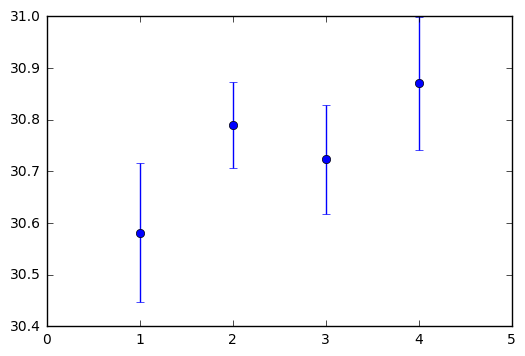

([30.581397647854001, 30.790009360310002, 30.723259892468, 30.870456366545994],
 [(0.13402106373611389,
   0.082739239057012526,
   0.10490513969131143,
   0.12899352070134995),
  (0.13402106373611389,
   0.082739239057012526,
   0.10490513969131143,
   0.12899352070134995)])

In [34]:
plot_workload("insert")